<a href="https://colab.research.google.com/github/Amulya-Rao-mj/Mall-Customer-Segmentation/blob/main/MallCustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


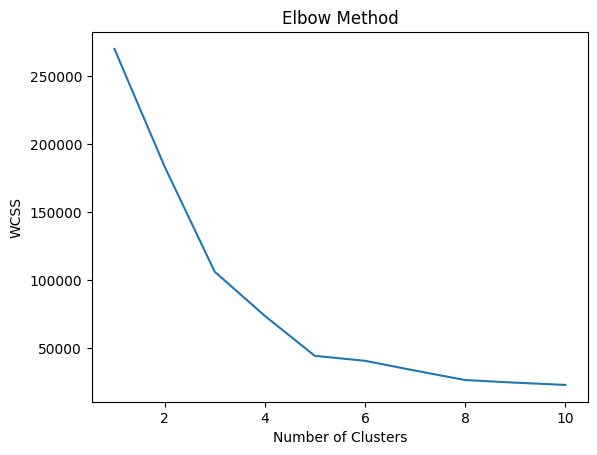

In [3]:
from sklearn.cluster import KMeans

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [4]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


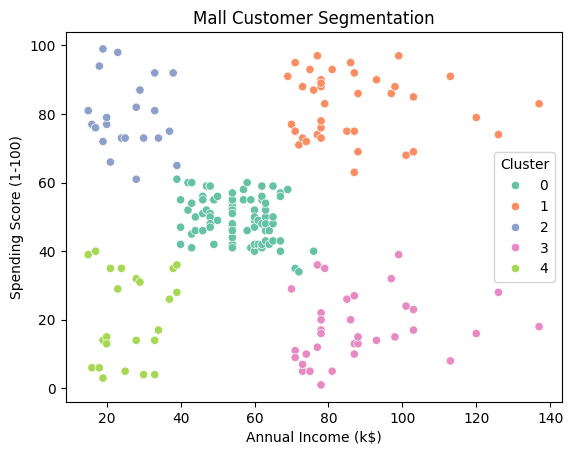

In [5]:
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='Set2'
)
plt.title("Mall Customer Segmentation")
plt.show()


In [6]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [8]:
df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


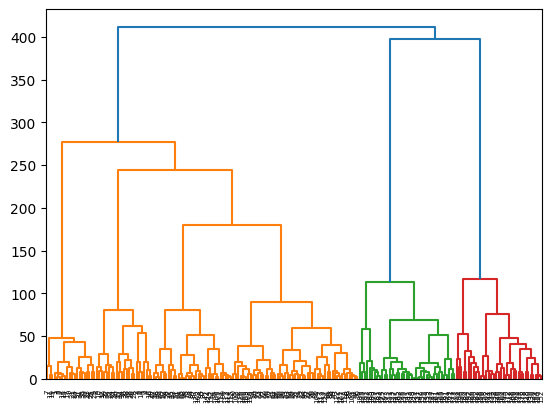

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X, method='ward')
dendrogram(linked)
plt.show()


In [10]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, df['Cluster'])
print("Silhouette Score:", score)


Silhouette Score: 0.445342943973765


In [12]:
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')


['kmeans_model.pkl']

In [13]:
import os
os.listdir()


['.config', 'Mall_Customers.csv', 'kmeans_model.pkl', 'sample_data']

In [14]:
import joblib

loaded_model = joblib.load('kmeans_model.pkl')


In [18]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [19]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


In [20]:
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')


['kmeans_model.pkl']

In [22]:
new_customer = [[25, 60, 80]]
loaded_model = joblib.load('kmeans_model.pkl')



In [23]:
new_customer = pd.DataFrame(
    [[25, 60, 80]],
    columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
)


In [24]:
cluster = loaded_model.predict(new_customer)[0]


In [25]:
cluster_meaning = {
    0: "Low Income – Low Spending Customer",
    1: "High Income – High Spending Customer (Target Group)",
    2: "Average Income – Average Spending Customer",
    3: "High Income – Low Spending Customer",
    4: "Low Income – High Spending Customer"
}

print("Prediction Result")
print(f"Customer belongs to Cluster {cluster}")
print(f"Customer Segment: {cluster_meaning[cluster]}")


Prediction Result
Customer belongs to Cluster 4
Customer Segment: Low Income – High Spending Customer
